In [27]:
## PLot images for ale ma of data organized by experiment

In [28]:
%matplotlib inline
from nilearn import plotting
from nilearn import surface
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
from os import listdir
from os.path import isfile, join
import nibabel as nib
from pathlib import Path

In [29]:
_nii_folder = r'../data_db/nifti-ale/by_exp/'
_nii_combos_folder = r'../data_db/nifti-ale/combos/by_exp/'
_img_folder_brain_glass = r'../data_db/nifti-ale/imgs/by_exp/brain_glass/'
_img_folder_stat_map = r'../data_db/nifti-ale/imgs/by_exp/stat_map/'
_img_folder_stat_map_manual = r'../data_db/nifti-ale/imgs/by_exp/stat_map/manual/'
_threshold = 1.644854 # cluster-level p < .05, one-tailed
_threshold_combos = 0

## Import nifti images

In [30]:
nifti_files = {Path(f).stem: os.path.join(os.path.abspath(_nii_folder), f) for f in listdir(_nii_folder) if isfile(join(_nii_folder, f))}
nifti_combos_files = {Path(f).stem: os.path.join(os.path.abspath(_nii_combos_folder), f) for f in listdir(_nii_combos_folder) if isfile(join(_nii_combos_folder, f))}


## Load images

In [31]:
nifti_images = {k:nib.load(f) for k,f in nifti_files.items()}
nifti_images_combos = {k:nib.load(f) for k,f in nifti_combos_files.items()}

# Plot for report
## Glass Brain for all points

C:\ProgramData\Anaconda3\envs\tfg-env\lib\site-packages\nilearn\plotting\displays\_slicers.py:383: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


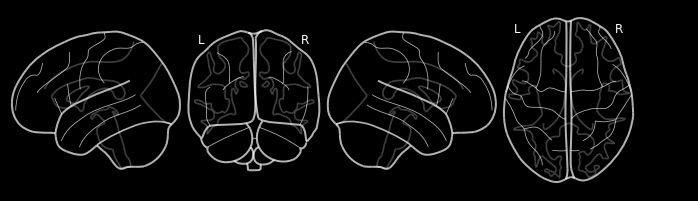

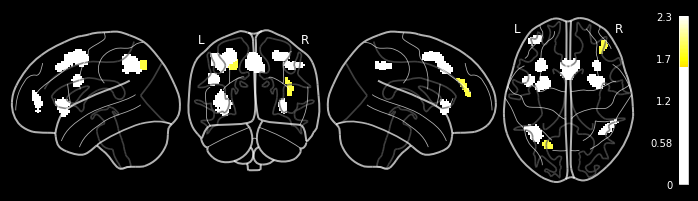

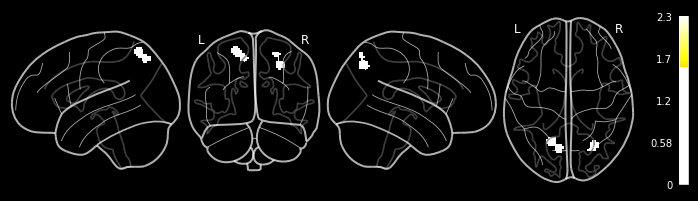

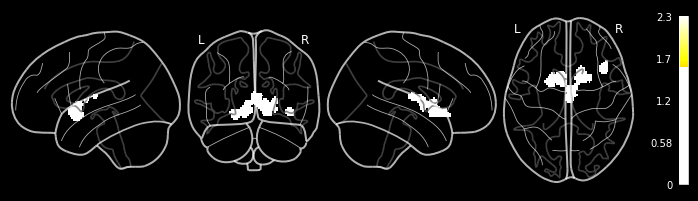

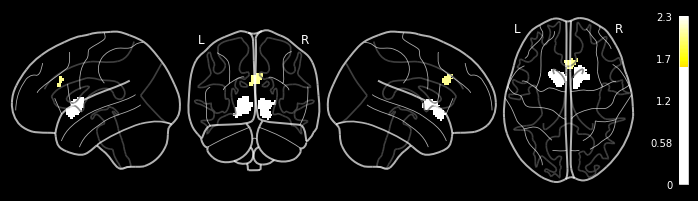

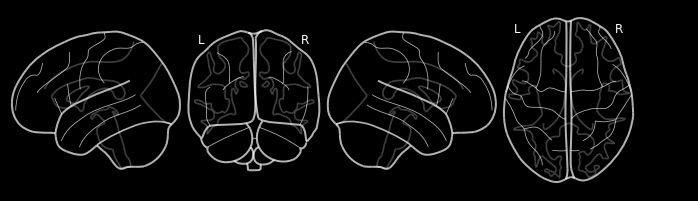

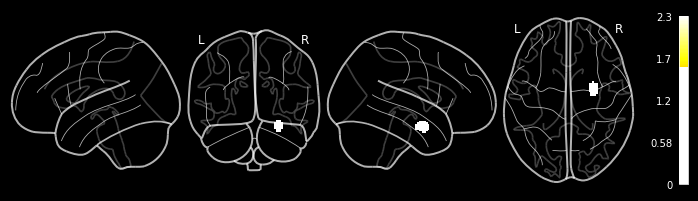

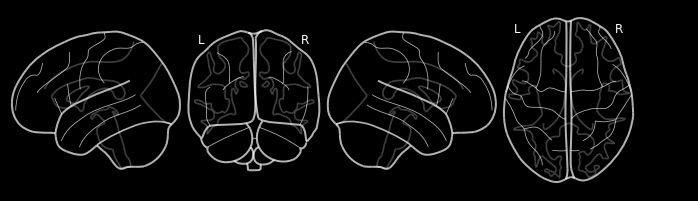

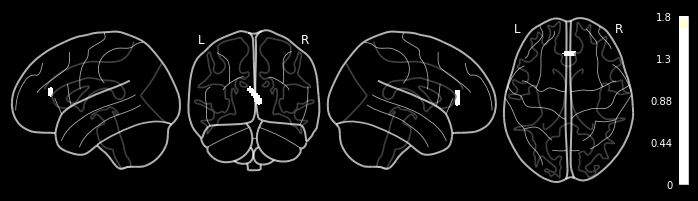

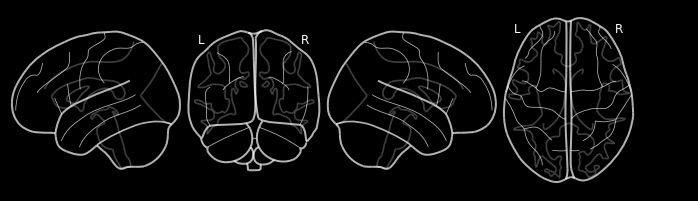

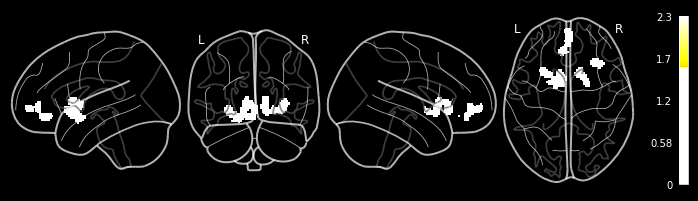

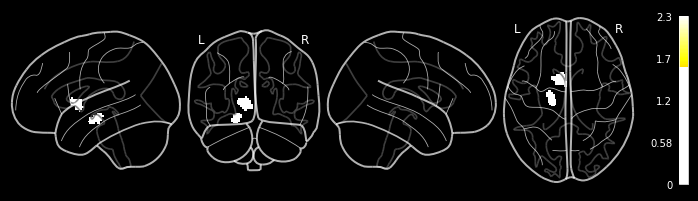

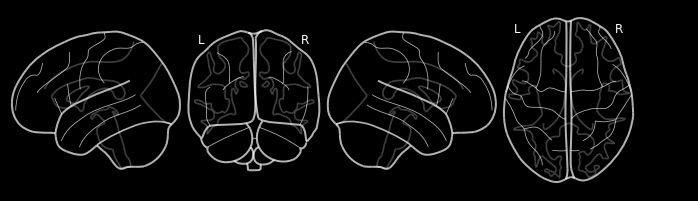

In [32]:
glass_images ={}
for key,val in nifti_images.items():
    glass_images[key] = plotting.plot_glass_brain(
        val, title='',colorbar=True,
        black_bg=True, display_mode='lyrz', threshold=_threshold) #display_mode='ortho' #if there are not voxels in both hemispheres

### Save glass brain images

In [33]:
for key,img in glass_images.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_brain_glass), key+".png"),dpi=300)

In [34]:
glass_images

{'select00_test': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23896942760>,
 'select01_wm': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23859a7b100>,
 'select02_wm_decision-making': <nilearn.plotting.displays._projectors.LYRZProjector at 0x2385e05ba90>,
 'select03_reward_anticipation_rw-norw': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238601ace80>,
 'select04_reward_anticipation_high_low_rew': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238622f32b0>,
 'select05_reward_anticipation_exp_recv_rew': <nilearn.plotting.displays._projectors.LYRZProjector at 0x2386445b100>,
 'select06_reward_outcome_rw-norw': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23885f01940>,
 'select07_reward_outcome_risk-safe': <nilearn.plotting.displays._projectors.LYRZProjector at 0x2388722f9d0>,
 'select08_reward_outcome_high-low': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238983dcc70>,
 'select09_reward_outcome_win-lose': <nile

In [35]:
### Save manually
glass_images['select01_wm'].savefig("test.png",dpi=300)

## Glass Brain for combos

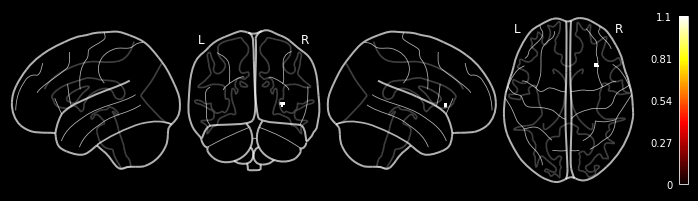

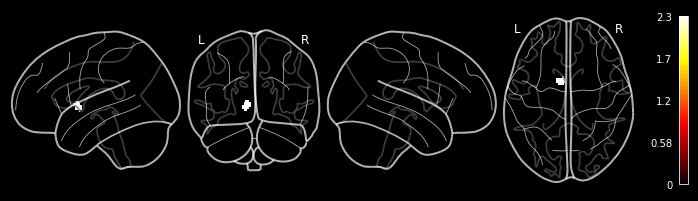

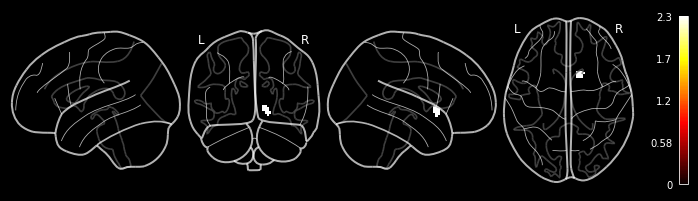

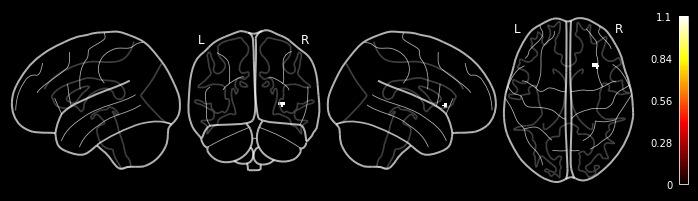

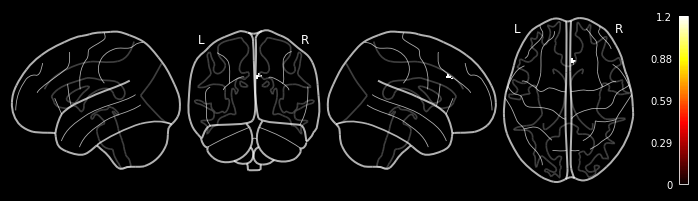

In [36]:
glass_images_combos ={}
for key,val in nifti_images_combos.items():
    glass_images_combos[key] = plotting.plot_glass_brain(
        val, title='',colorbar=True,
        black_bg=True, display_mode='lyrz', threshold=_threshold_combos) #display_mode='ortho' #if there are not voxels in both hemispheres

### Save glass brain images

In [37]:
for key,img in glass_images_combos.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_brain_glass), key+".png"),dpi=300)

In [38]:
glass_images_combos

{'img_combo1_1': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238a3373a00>,
 'img_combo1_2': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238a62d0a90>,
 'img_combo1_3': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238aa61eb20>,
 'img_combo1_4': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238af0bdbb0>,
 'img_combo1_5': <nilearn.plotting.displays._projectors.LYRZProjector at 0x238b079fc40>}

In [39]:
### Save manually
glass_images_combos['img_combo1_3'].savefig("test.png",dpi=300)

## Sections

### Automatic - all points

0it [00:00, ?it/s]

select00_test


1it [00:09,  9.23s/it]

select01_wm


2it [00:18,  9.06s/it]

select02_wm_decision-making


3it [00:27,  9.02s/it]

select03_reward_anticipation_rw-norw


4it [00:36,  9.04s/it]

select04_reward_anticipation_high_low_rew


5it [00:45,  9.02s/it]

select05_reward_anticipation_exp_recv_rew


6it [00:54,  9.13s/it]

select06_reward_outcome_rw-norw


7it [01:03,  9.21s/it]

select07_reward_outcome_risk-safe


8it [01:13,  9.40s/it]

select08_reward_outcome_high-low


9it [01:23,  9.38s/it]

select09_reward_outcome_win-lose


10it [01:32,  9.35s/it]

select10_reward_decision-making_outcome


11it [01:41,  9.33s/it]

select11_reward_decision-making_anticipation


12it [01:51,  9.35s/it]

select12_reward_decision-making_decision


13it [02:00,  9.25s/it]


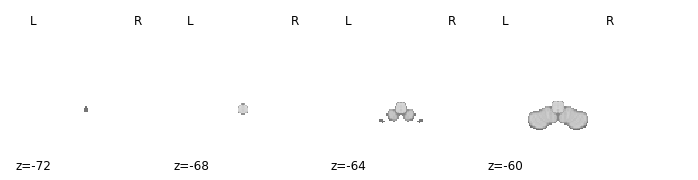

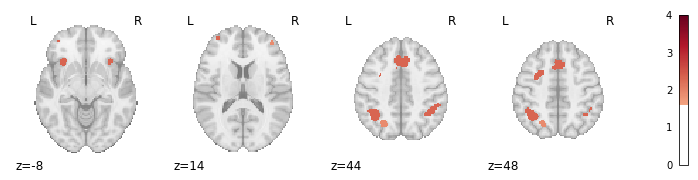

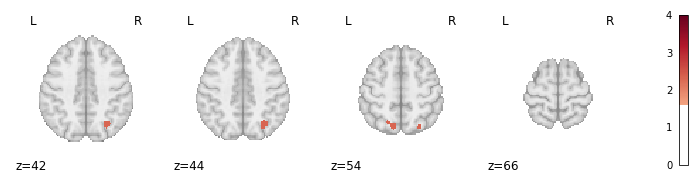

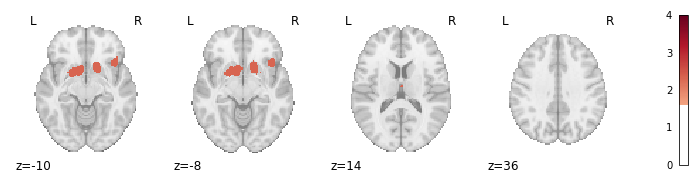

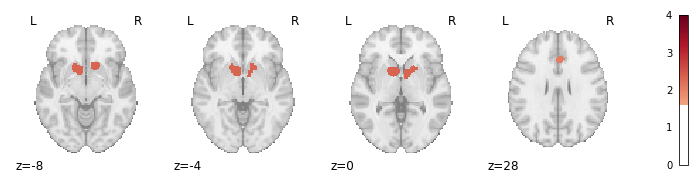

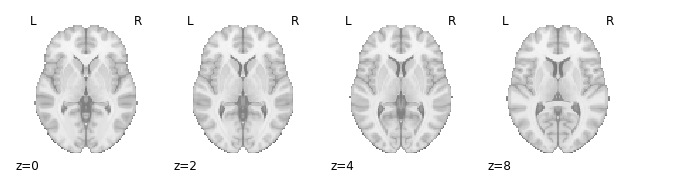

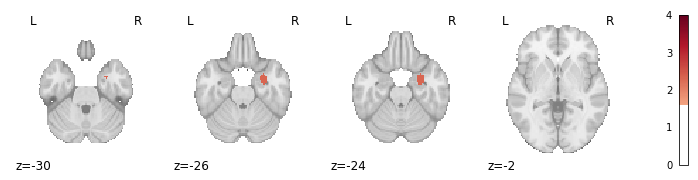

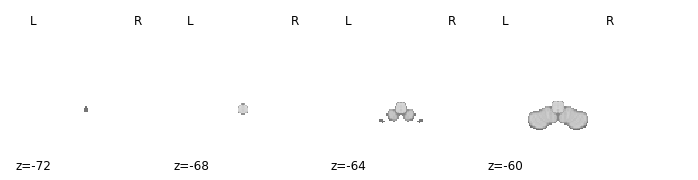

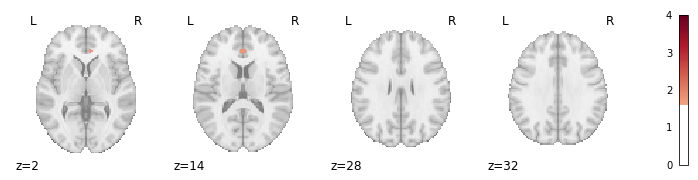

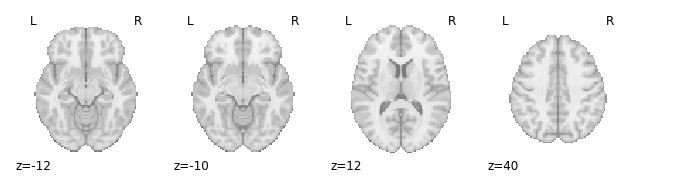

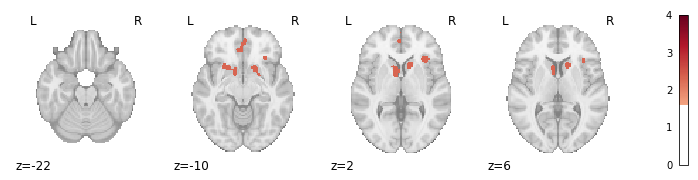

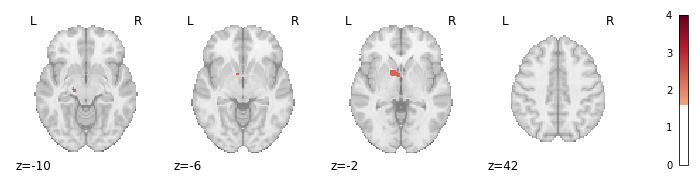

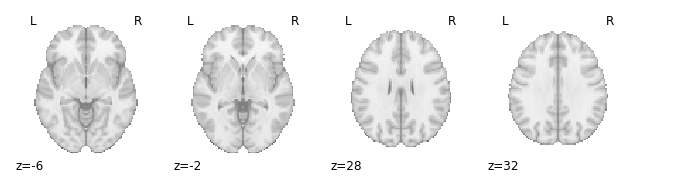

In [40]:
stat_map={}
res_len = len(nifti_images)
# fig, axes = plt.subplots(figsize=(12, res_len * 10), nrows=res_len)
for index, (k, image) in tqdm(enumerate(nifti_images.items())):
    print(k)
    stat_map[k] = plot_stat_map(
        image,
        cut_coords=4,
        display_mode="z",
        # title="",#"Semantic select " + str(index),
        threshold=_threshold,  #'auto'
        cmap="RdBu_r",
        vmax=4,
        # axes=axes[index],
        # figure=fig,
    )

#### Save Section image - all points

In [41]:
for key,img in stat_map.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map), key+".png"),dpi=300)

### Sections - Automatic in COG

In [42]:
lst = [(29, -66, 44),(-10, -69, 52),(-19, -61, 60)]
## Import the cog from csv

## do sections for all images in cog

### Automatic - combos

0it [00:00, ?it/s]

img_combo1_1


1it [00:09,  9.21s/it]

img_combo1_2


2it [00:18,  9.04s/it]

img_combo1_3


3it [00:26,  8.85s/it]

img_combo1_4


4it [00:35,  8.94s/it]

img_combo1_5


5it [00:44,  8.91s/it]


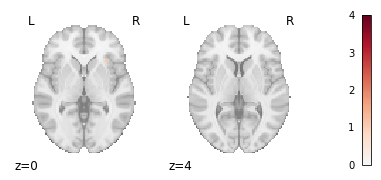

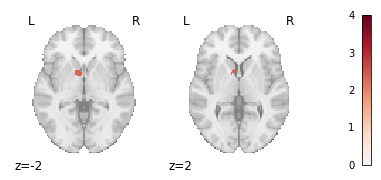

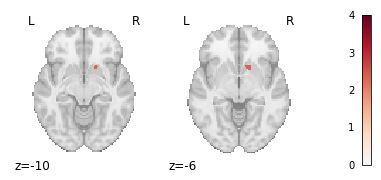

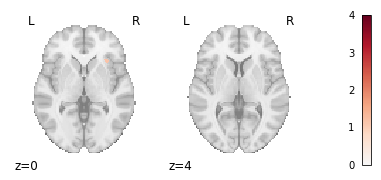

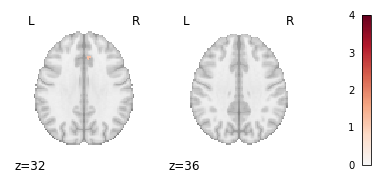

In [43]:
stat_map_combos={}
res_len = len(nifti_images_combos)
for index, (k, image) in tqdm(enumerate(nifti_images_combos.items())):
    print(k)
    stat_map_combos[k] = plot_stat_map(
        image,
        cut_coords=2,
        display_mode="z",
        # title="",#"Semantic select " + str(index),
        threshold=_threshold_combos,  #'auto'
        cmap="RdBu_r",
        vmax=4,
    )

#### Save Section image - combos

In [44]:
for key,img in stat_map_combos.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map), key+".png"),dpi=300)

### Manual

In [45]:
list(nifti_images.keys())

['select00_test',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

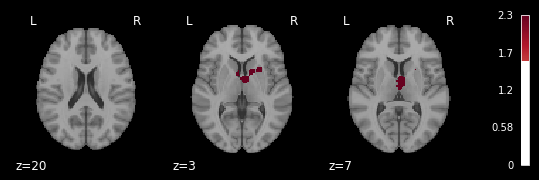

In [48]:
file_name = 'select03_reward_anticipation_rw-norw'
image = nifti_images[file_name]
lst = [(28, -68, 47),(-15, -65, 56)]
stat_map_img = plot_stat_map(
    image,
    cut_coords=[20,3,7],
    display_mode="z",
    # title=" ",
    threshold=_threshold,  #'auto'
    cmap="RdBu_r",
    # vmax=4,
    black_bg=True,
)

In [49]:
stat_map_img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map_manual),file_name+'.png'),dpi=300)